# 第14回 データの読み方

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tsuboshun/begin-python/blob/gh-pages/_sources/workbook/lecture14.ipynb)

___

## この授業で学ぶこと

準備中

## データの種類

データ分析を行うにあたって、どのような種類のデータを扱っているかを認識することが重要である。
この節では、データの大まかな分類について説明する。

まず、データは大まかに質的変数と量的変数に分けられる。
質的変数はさらに名義尺度と順序尺度に分類され、量的変数はさらに間隔尺度と比例尺度に分類される。

| 種類 | 尺度 | 概要 | 例 |
| --- | --- | --- | --- |
| 質的変数 | 名義尺度 | 分類のための尺度。順番にも間隔にも意味がない。 | 性別、血液型  |
| 質的変数 | 順序尺度 | 分類のための尺度。順番に意味があるが、間隔に意味がない。 | 5段階評価 |
| 量的変数 | 間隔尺度 | 量を表す尺度。順番にも間隔にも意味があるが、比率に意味がない。| 温度、西暦 |
| 量的変数 | 比例尺度 | 量を表す尺度。順番・間隔・比率に意味がある。 | 金額、重さ |

それぞれの尺度の概要は、上の表の通りである。例をもとに具体的に説明しよう。

名義尺度の例として、性別が挙げられる。性別は人間に男性または女性というラベルを割り当てたものであって、これらのラベルの順番に意味はないし、間隔というものを考えることもできない。

順序尺度の例として、5段階評価が挙げられる。
例えば顧客の満足度を1から5の整数で表してデータを集計したとして、これらの数値の順番には意味があるが、間隔には意味がない。
評価5は大満足、評価4は満足を表すのであって、評価5と評価4の差が、評価2と評価1の差と同じ程度のものかはわからない。

間隔尺度の例として、温度（℃）が挙げられる。
温度は順番にも間隔にも意味がある。しかし、0℃は人間が適当に決めた基準であって、それ以下がないという意味の絶対的な0度ではない。したがって、30℃は15℃の2倍という主張にあまり意味がない。実際、華氏（℉）に直すと30℃は86℉、15℃は59℉であり、0度の基準が異なれば、先ほどの主張が成立しなくなる。

比例尺度の例として、金額が挙げられる。金額は順番・間隔・比率に意味がある。例えば、100円玉を5枚集めると500円になるので、500円は100円の5倍という主張は正しい。

## データの分布と代表値

### 分布の可視化

データの**分布**とは、データの値が全体にどのように散らばっているか、または集中しているかを示すものである。データの分布を確認すると、データの全体的な構造や傾向を理解することができる。そのためデータ分析の最初の一歩として、データの分布を確認することが多い。この節ではデータの分布を調べ、そこから有用な情報を得るための方法をいくつか学ぶ。

この節で利用するライブラリのimportを行う。前回も利用した `'diamonds'` というテーブルデータを利用する。

In [1]:
#pip install japanize_matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib
plt.rcParams.update({'font.size': 14})  # 文字サイズを14pxとする

In [3]:
df = sns.load_dataset('diamonds')

データの分布を確認するための可視化手法に**棒グラフ**と**ヒストグラム**がある。

質的変数などの取りうる値の種類が少ないデータに対しては、棒グラフを描くことが有効である。質的変数の取る値の種類を**カテゴリ**というが、カテゴリごとのデータ数を集計して棒グラフとしてプロットする例を以下に示す。

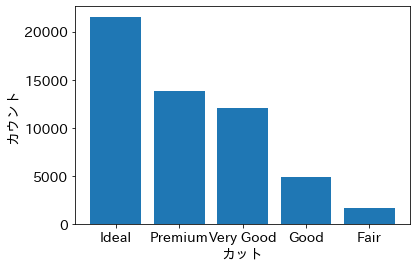

In [4]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
cut_counts = df["cut"].value_counts()

# 棒グラフのプロット
ax.bar(cut_counts.index, cut_counts.values)

# 軸ラベルの設定
ax.set_xlabel("カット")
ax.set_ylabel("カウント")

# 表示
plt.show()

ここでシリーズの `value_counts()` メソッドにより、カテゴリをラベル、そのデータ数を要素とするシリーズを作成している。Axesの `bar()` メソッドに、indexと値を渡すことで棒グラフをプロットすることができる。

In [5]:
cut_counts  # カテゴリをラベル、データ数を要素とするシリーズ

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

量的変数などの取りうる値の種類が多いデータに対しては、ヒストグラムが有効である。

ヒストグラムはデータの値をいくつかの階級に分割し、階級ごとのデータ数を集計して可視化する。
ヒストグラムのプロット例を以下に示す。`diamonds` データセットにおける `"price"` の値を1次元配列として取得し、そのヒストグラムをプロットしている。

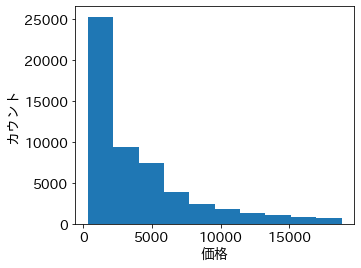

In [6]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
x = df["price"].values

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

Axesの `hist()` メソッドに1次元配列を渡すことで、ヒストグラムを作成できる。キーワード引数で `bins` を指定すると、横軸の分割数を指定できる（**ビン数**という）。ビン数を大きくすると、より細かい粒度で分布の形を確認できる。
上のヒストグラムからは、例えば価格の低いダイヤモンドにデータ数が偏っていることが確認できる。

上の例では価格という1つの軸をもとにデータを分割したが、2つの軸をもとにデータを分割してデータ数を確認することもできる。
そのようなヒストグラムを**2次元ヒストグラム**という。

2次元ヒストグラムのプロット例を以下に示す。
横軸に `"carat"` の対数の値を、縦軸に `"price"` の対数の値をとり、それ上のデータ数を**カラープロット**により表現している。

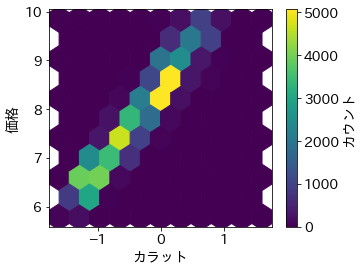

In [7]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(5, 4))

# データの用意
x = np.log(df["carat"].values)
y = np.log(df["price"].values)

# 2次元ヒストグラムのプロット
hb = ax.hexbin(x, y, gridsize=10)

# カラーバーのプロット
cb = fig.colorbar(hb, ax=ax)
cb.set_label('カウント')

# 軸ラベルの設定
ax.set_xlabel("カラット")
ax.set_ylabel("価格")

# 表示
plt.show()

ヒストグラムの階級を作るにあたって平面を六角形で分割している。このような区分を**Hexbin**という。
色とデータ数の対応関係を表すのが、右横の**カラーバー**である。
カラーバーは　`#カラーバーのプロット` 以下の2行によりプロットできる。

### 代表値

データの分布を確認する代わりに、分布を要約するような統計量を調べることもよく行われる。
このような統計量のことを**代表値**という。
代表値の例としては、平均値（または平均）、標準偏差、中央値などがある。とくにデータが正規分布にしたがうときは、平均と標準偏差だけで分布を再現することができるので、これらは分布についての十分な情報を持つ。

正規分布にしたがうデータについて、平均と標準偏差を求めて分布と照らし合わせてみよう。
以下では、`np.random.normal()` 関数により平均10、標準偏差2の正規分布にしたがうデータを1000個生成し、そのヒストグラムを作成している。

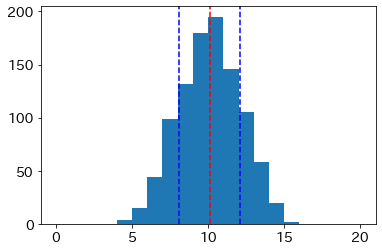

In [8]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = np.random.normal(loc=10, scale = 2, size  = 1000)

# ヒストグラムのプロット
ax.hist(x, bins=20, range=(0, 20))

# 平均、標準偏差の可視化
mean = np.mean(x)
std = np.std(x)
ax.axvline(mean, linestyle='--', color='red')
ax.axvline(mean-std, linestyle='--', color='blue')
ax.axvline(mean+std , linestyle='--', color='blue')

# 表示
plt.show()

`sample_data` から求まる平均を $\hat{\mu}$、標準偏差を $\hat{\sigma}$ と書くとき、$\hat{\mu}-\hat{\sigma}$、$\hat{\mu}$、$\hat{\mu}+\hat{\sigma}$ の位置を `axvline()` メソッドによりそれぞれ縦の点線として表示している。
データが正規分布にしたがうとき、平均は分布のちょうど真ん中あたりに来る。また $\hat{\sigma}$ の大きさが、データの平均的な（平均値からの）バラつきの大きさを表していることも確認できる。

平均と標準偏差の記号にハットがついているのは、これらはデータを生成するのに指定した平均と標準偏差から一般にズレた値になるからである。
後者を母平均、母標準偏差といい、これらの値を $\mu$、$\sigma$ で表す（ここでは $\mu = 10$、$\sigma = 2$）。

注意したいのが、「**平均は必ずしも普通を表さない**」ということである。例えば、先ほどのダイヤモンドの価格の例で、平均の位置を縦の点線で表示すると次のようになる。

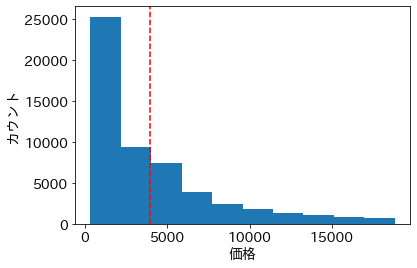

In [9]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = df["price"].values

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 平均の可視化
ax.axvline(np.mean(x), linestyle='--', color='red')

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

データ数のピークが左の方にある中で、赤の点線の位置を普通と捉えるのは疑問である。この例のように分布の裾が長く、歪んだ形をしているとき、平均値はあまり良い代表値とは言えなくなる。また例えば、このテーブルデータにたった1個1億ドルのダイヤモンドのデータを追加するだけで、平均値は右に1850ドル近くシフトする。このような**外れ値**に引っ張られるというのも、平均値の欠点の1つである。

### 変数変換

価格のような比例尺度は、対数をとると分布の形が綺麗になることが多い。

その理由は、価格の場合、差は比率で考える方が、社会的な慣習としてより自然なためである。
例えば、10ドルの商品を11ドルに値上げするのと、1000ドルの商品を1001ドルに値上げするのとでは、前者の方が大きな値上げに感じると思う。
これは私たちが価格の差を比率で捉えることに慣れていることに起因する。

価格についてそのままヒストグラムを作成すると、例えばビンの幅を1ドルとして、10ドル 〜 11ドルのデータ数を1000ドル 〜 1001ドルのデータ数と比較することになる。しかし、高価格帯における1ドルの重みは低価格帯と比べて低いので、このような分割を行うと高価格帯ほどデータ数の少ない裾の長い分布が得られやすい。一方で、価格について対数をとってからヒストグラムを作成すると、例えば10ドル 〜 11ドルのデータ数は1000ドル 〜 1100ドルのデータ数と比較されることになる。これは $\log a - \log b = \log\frac{a}{b}$ より $\log$ のスケールで一定間隔をとることは、元のスケールで一定比率でビンを作るのと等しいためである。そして、価格においては対数をとることでデータの分布は釣鐘型に近くなることが多い。

価格について対数をとってから、ヒストグラムを作成する例を以下に示す。平均を赤の点線で示している。

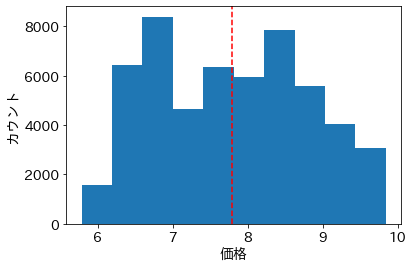

In [10]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = np.log(df["price"].values)

# ヒストグラムのプロット
ax.hist(x, bins=10)

# 平均の可視化
ax.axvline(np.mean(x), linestyle='--', color='red')

# 軸ラベルの設定
ax.set_xlabel("価格")
ax.set_ylabel("カウント")

# 表示
plt.show()

適切な変数変換を行うと、変換前には見えなかった特徴を見つけられることがある。この例ではピークが2つあるように見える。

### 層別分析

`diamonds` データセットのように複数の要素からなるデータに対しては、とある基準でデータをグループ分けしたあとで、グループごとに分析すると有効なことが多い。このような分析を**層別分析**という。

例として、カラットについて $(0, 0.5], (0.5, 1], (1, 1.5], (1.5, 2], (2, 6]$ の5つの範囲でグループ分けをして、それぞれのグループで価格の分布を調べてみよう。ここで $(a, b]$ という記号は $a < x \leq b$ という不等式で表される区間を表す。

In [11]:
bins = np.array([0, 0.5, 1, 1.5, 2, 6])
df['carat_bin'] = pd.cut(df['carat'], bins=bins)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_bin
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.0, 0.5]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.0, 0.5]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.0, 0.5]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0.0, 0.5]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0.0, 0.5]"


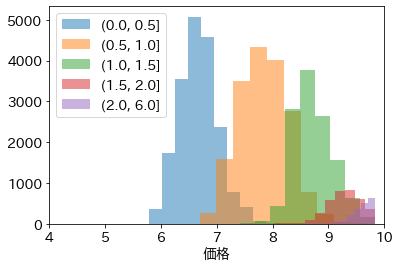

In [13]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# ヒストグラムのプロット
for value in df['carat_bin'].unique():
    df_subset = df[df['carat_bin'] == value]
    x = np.log(df_subset["price"].values)
    ax.hist(x, bins=10, alpha=0.5, label=str(value))
    
# 軸の範囲を設定
ax.set_xlim((4, 10))

# 軸ラベルの設定
ax.set_xlabel("価格")
    
# 表示
plt.legend()
plt.show()

## 相関と因果

In [14]:
# 相関の説明

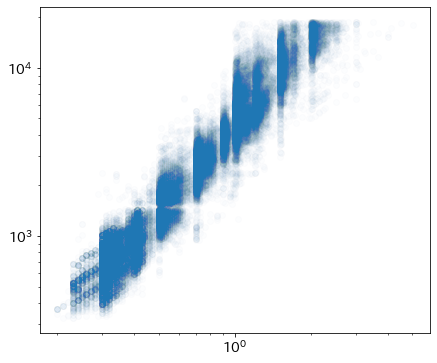

In [15]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(7, 6))

# データの用意
x = df["carat"]
y = df["price"]

# 散布図
ax.scatter(x, y, alpha=0.01)

# 軸の設定（対数スケール）
ax.set_xscale('log')
ax.set_yscale('log')

# 表示
plt.show()

In [16]:
# 擬似相関の説明

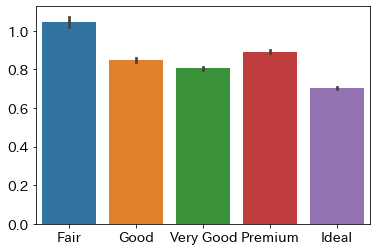

In [17]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = df["cut"].values
y = df["carat"].values

# 棒グラフのプロット
sns.barplot(x=x, y=y, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=ax)

# 表示
plt.show()

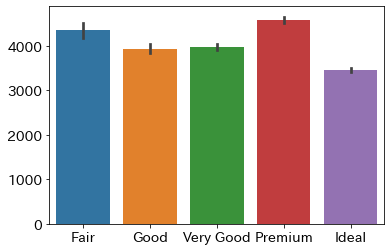

In [18]:
# プロットの入れ物の用意
fig, ax = plt.subplots(figsize=(6, 4))

# データの用意
x = df["cut"].values
y = df["price"].values

# 棒グラフのプロット
sns.barplot(x=x, y=y, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=ax)

# 表示
plt.show()